# Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# load dataset

In [6]:
df=pd.read_csv('diabetes.csv')

# EDA 
#  (a) undestanding dataset

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
df.describe()

# (b) Data cleaning

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
print(df['Glucose'][df['Glucose']==0].shape[0])
print(df['BloodPressure'][df['BloodPressure']==0].shape[0])
print(df['SkinThickness'][df['SkinThickness']==0].shape[0])
print(df['Insulin'][df['Insulin']==0].shape[0])
print(df['BMI'][df['BMI']==0].shape[0])

5
35
227
374
11


In [10]:
df['Glucose'].replace(0,df['Glucose'].mean(),inplace=True)
df['BloodPressure'].replace(0,df['BloodPressure'].mean(),inplace=True)
df['SkinThickness'].replace(0,df['SkinThickness'].mean(),inplace=True)
df['Insulin'].replace(0,df['Insulin'].mean(),inplace=True)
df['BMI'].replace(0,df['BMI'].mean(),inplace=True)

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data visualisation

In [ ]:
#checking data is balanced or not 
sns.countplot(data=df,x='Outcome')
plt.show()

In [ ]:
df.hist(bins=10,figsize=(10,10))
plt.show()

In [ ]:
plt.figure(figsize=(16,12))
plt.subplot(3,3,1)
sns.boxplot(x=df['Glucose'])
plt.subplot(3,3,2)
sns.boxplot(x=df['BloodPressure'])
plt.subplot(3,3,3)
sns.boxplot(x=df['SkinThickness'])
plt.subplot(3,3,4)
sns.boxplot(x=df['Insulin'])
plt.subplot(3,3,5)
sns.boxplot(x=df['BMI'])
plt.subplot(3,3,6)
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.subplot(3,3,7)
sns.boxplot(x=df['Age'])
plt.subplot(3,3,8)
sns.boxplot(x=df['Pregnancies'])

In [ ]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df,figsize=(20,15))
plt.show()

# feature selection

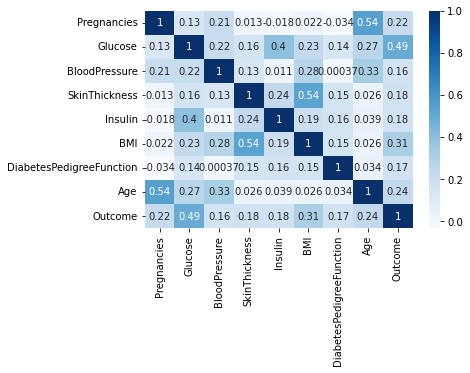

In [12]:
corrmat=df.corr()
sns.heatmap(corrmat,annot=True,cmap='Blues')
plt.show()

In [13]:
df.drop(columns=['BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction'],inplace=True)

In [14]:
df.head()

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148.0,33.6,50,1
1,1,85.0,26.6,31,0
2,8,183.0,23.3,32,1
3,1,89.0,28.1,21,0
4,0,137.0,43.1,33,1


# Split into X and y

In [15]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
X.shape,y.shape

((768, 4), (768,))

# Split into train and test dataset

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=48)

In [19]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((537, 4), (231, 4), (537,), (231,))

# KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
model=KNeighborsClassifier(n_neighbors=5)

In [22]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
predict=model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix

In [25]:
accuracy_score(y_test,predict)

0.7575757575757576

In [26]:
precision_score(y_test,predict)

0.6825396825396826

In [27]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.79      0.87      0.82       152
           1       0.68      0.54      0.61        79

    accuracy                           0.76       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



In [28]:
confusion_matrix(y_test,predict)

array([[132,  20],
       [ 36,  43]], dtype=int64)

# Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr_model=LogisticRegression()

In [31]:
lr_model.fit(x_train,y_train)

LogisticRegression()

In [32]:
lr_predict=lr_model.predict(x_test)

In [33]:
accuracy_score(y_test,lr_predict)

0.7922077922077922

In [34]:
precision_score(y_test,lr_predict)

0.7627118644067796

In [35]:
print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       152
           1       0.76      0.57      0.65        79

    accuracy                           0.79       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.79      0.79      0.78       231



In [36]:
confusion_matrix(y_test,lr_predict)

array([[138,  14],
       [ 34,  45]], dtype=int64)

# SVM

In [ ]:
from sklearn.svm import SVC
svc_model=SVC()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
svc_parameters={
    'kernel':['linear'],
    'C':[0.1,1,10,100]
}

In [ ]:
rsv_model=RandomizedSearchCV(svc_model,param_distributions=svc_parameters,n_iter=100,cv=5)

In [ ]:
rsv_model.fit(x_train,y_train)

In [ ]:
rsv_model.best_score_

In [ ]:
rsv_model.best_params_

In [ ]:
svc_poly_parameters={
    'kernel':['rbf'],
    'C':[0.1,1,10,100],
    'gamma':[10,1,0.1,0.01,0.001]
}

In [ ]:
rsv_model=RandomizedSearchCV(svc_model,param_distributions=svc_poly_parameters,n_iter=10,cv=5)

In [ ]:
rsv_model.fit(x_train,y_train)

In [ ]:
rsv_model.best_score_

In [ ]:
rsv_model.best_params_

# Random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [38]:
rfc_parameters={
    'max_depth':[int(x) for x in np.linspace(5,40,8)],
    'min_samples_split':[2,5,10,30,70,100],
    'min_samples_leaf':[1,3,7,10],
    'max_features':["auto", "sqrt", "log2"]
}

In [39]:
rfc_model=RandomizedSearchCV(rfc,param_distributions=rfc_parameters,random_state=48,n_iter=10,cv=5)

NameError: name 'RandomizedSearchCV' is not defined

In [40]:
rfc_model.fit(x_train,y_train)

NameError: name 'rfc_model' is not defined

In [ ]:
rfc_model.best_score_

In [ ]:
rfc_model.best_params_

In [3]:
import os
import pickle

In [41]:
pickle.dump(lr_model,open('diabetes_model.txt','wb'))
pickle.load(open('diabetes_model.txt','rb'))

LogisticRegression()